# Classifying Music Genres

This data is from Spotify, which tracks a number of internally determined metrics for each track, such as "acousticness," "instrumentalness," and "energy." Perhaps it is possible to predict the genre of a song based on these statistics.

https://www.kaggle.com/datasets/purumalgi/music-genre-classification

Honor Pledge:
I pledge on my honor that I, Daniel Kwan, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment.

* Decide on solving a problem and find an appropriate data set.
* Write clearly the source of the data. Provide the link at the top.
* Apply data cleaning, data preparation, visualization, etc.
* Apply several of the machine learning models we have learned in class. Please, if possible, try to apply some models from outside the class.
* Conclude with the best model and its predictions. What are your findings? If you had more time what do you think can be done further to improve the results?
* Provide some writing and explanations throughout your notebook.
* The size of the project should be similar to what we have done in the class projects.
* The project can be done individually or in groups. In either case, write your name(s) at the very top.
* If working as a group, only one student should submit the project files.
* Submit your files under Submission -> Project ML

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

The data came in train/test splits, but the test split doesn't include class, so I can't verify model performance. Since the train set is still very large, I'll just split it into its own train/test sets.

In [2]:
# Import data
df = pd.read_csv('train.csv')

From Spotify's API: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

* acousticness : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* danceability : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* duration_ms : The duration of the track in milliseconds.
* energy : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* instrumentalness : Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* key : The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
* liveness : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* loudness : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
* mode : Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* speechiness : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* tempo : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* time_signature : An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
* valence : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


The genres are:
* 0 : Acoustic / Folk
* 1 : Alternative
* 2 : Blues
* 3 : Bollywood
* 4 : Country
* 5 : Hip Hop
* 6 : Indie
* 7 : Instrumental
* 8 : Metal
* 9 : Pop
* 10 : Rock

In [3]:
# Quick look
df.head()

Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)        60.0   
1                 Boston                           Hitch a Ride        54.0   
2          The Raincoats                     No Side to Fall In        35.0   
3                   Deno             Lingo (feat. J.I & Chunkz)        66.0   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered        53.0   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564   1.0    -4.964     1       0.0485      0.017100   
1         0.382   0.814   3.0    -7.230     1       0.0406      0.001100   
2         0.434   0.614   6.0    -8.334     1       0.0525      0.486000   
3         0.853   0.597  10.0    -6.528     0       0.0555      0.021200   
4         0.167   0.975   2.0    -4.279     1       0.2160      0.000169   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0               NaN    0.0849   0.8990  134.071            234596.0   
1          0.004010    0.1010   0.5690  116.454            251733.0   
2          0.000196    0.3940   0.7870  147.681            109667.0   
3               NaN    0.1220   0.5690  107.033            173968.0   
4          0.016100    0.1720   0.0918  199.060            229960.0   

   time_signature  Class  
0               4      5  
1               4     10  
2               4      6  
3               4      5  
4               4     10

In [4]:
# Checking for nulls and looking at basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [5]:
df.describe()

Popularity  danceability        energy           key      loudness  \
count  17568.000000  17996.000000  17996.000000  15982.000000  17996.000000   
mean      44.512124      0.543433      0.662777      5.952447     -7.910660   
std       17.426928      0.166268      0.235373      3.196854      4.049151   
min        1.000000      0.059600      0.000020      1.000000    -39.952000   
25%       33.000000      0.432000      0.509000      3.000000     -9.538000   
50%       44.000000      0.545000      0.700000      6.000000     -7.016000   
75%       56.000000      0.659000      0.860000      9.000000     -5.189000   
max      100.000000      0.989000      1.000000     11.000000      1.355000   

               mode   speechiness  acousticness  instrumentalness  \
count  17996.000000  17996.000000  17996.000000      13619.000000   
mean       0.636753      0.079707      0.247082          0.177562   
std        0.480949      0.083576      0.310632          0.304048   
min        0.000000      0.022500      0.000000          0.000001   
25%        0.000000      0.034800      0.004300          0.000089   
50%        1.000000      0.047400      0.081400          0.003910   
75%        1.000000      0.083000      0.434000          0.200000   
max        1.000000      0.955000      0.996000          0.996000   

           liveness       valence         tempo  duration_in min/ms  \
count  17996.000000  17996.000000  17996.000000        1.799600e+04   
mean       0.196170      0.486208    122.623294        2.007445e+05   
std        0.159212      0.240195     29.571527        1.119891e+05   
min        0.011900      0.018300     30.557000        5.016500e-01   
25%        0.097500      0.297000     99.620750        1.663370e+05   
50%        0.129000      0.481000    120.065500        2.091600e+05   
75%        0.258000      0.672000    141.969250        2.524900e+05   
max        1.000000      0.986000    217.416000        1.477187e+06   

       time_signature         Class  
count    17996.000000  17996.000000  
mean         3.924039      6.695821  
std          0.361618      3.206073  
min          1.000000      0.000000  
25%          4.000000      5.000000  
50%          4.000000      8.000000  
75%          4.000000     10.000000  
max          5.000000     10.000000

Lots of missing values in **key** and **instrumentalness**. Missing **key** values could be replaced with "other" considering this is a categorical variable disguised as a numeric one. After looking closer at **instrumentalness**, I decided that the null values should actually be 0, considering there are no 0 values in the dataset.

In [6]:
df.loc[df['instrumentalness'].isnull(), 'instrumentalness'] = 0

In [7]:
df.loc[df['key'].isnull(), 'key'] = 0

For missing **Popularity** values, I replaced them with the mean value of the popularity from their genre, which possibly disguises some hits and popularizes some stinkers, but since it's just 428 songs out of nearly 18,000, I believe the overall effect will be negligible.

In [8]:
for val in df['Class'].unique():
    df.loc[df['Popularity'].isnull() & (df['Class']==val), 'Popularity'] = df.loc[df['Class'] == val, 'Popularity'].mean()

In [9]:
# No more null values
df.describe()

Popularity  danceability        energy           key      loudness  \
count  17996.000000  17996.000000  17996.000000  17996.000000  17996.000000   
mean      44.499522      0.543433      0.662777      5.286286     -7.910660   
std       17.245727      0.166268      0.235373      3.549335      4.049151   
min        1.000000      0.059600      0.000020      0.000000    -39.952000   
25%       33.000000      0.432000      0.509000      2.000000     -9.538000   
50%       44.000000      0.545000      0.700000      5.000000     -7.016000   
75%       56.000000      0.659000      0.860000      8.000000     -5.189000   
max      100.000000      0.989000      1.000000     11.000000      1.355000   

               mode   speechiness  acousticness  instrumentalness  \
count  17996.000000  17996.000000  17996.000000      17996.000000   
mean       0.636753      0.079707      0.247082          0.134375   
std        0.480949      0.083576      0.310632          0.275251   
min        0.000000      0.022500      0.000000          0.000000   
25%        0.000000      0.034800      0.004300          0.000001   
50%        1.000000      0.047400      0.081400          0.000343   
75%        1.000000      0.083000      0.434000          0.056600   
max        1.000000      0.955000      0.996000          0.996000   

           liveness       valence         tempo  duration_in min/ms  \
count  17996.000000  17996.000000  17996.000000        1.799600e+04   
mean       0.196170      0.486208    122.623294        2.007445e+05   
std        0.159212      0.240195     29.571527        1.119891e+05   
min        0.011900      0.018300     30.557000        5.016500e-01   
25%        0.097500      0.297000     99.620750        1.663370e+05   
50%        0.129000      0.481000    120.065500        2.091600e+05   
75%        0.258000      0.672000    141.969250        2.524900e+05   
max        1.000000      0.986000    217.416000        1.477187e+06   

       time_signature         Class  
count    17996.000000  17996.000000  
mean         3.924039      6.695821  
std          0.361618      3.206073  
min          1.000000      0.000000  
25%          4.000000      5.000000  
50%          4.000000      8.000000  
75%          4.000000     10.000000  
max          5.000000     10.000000

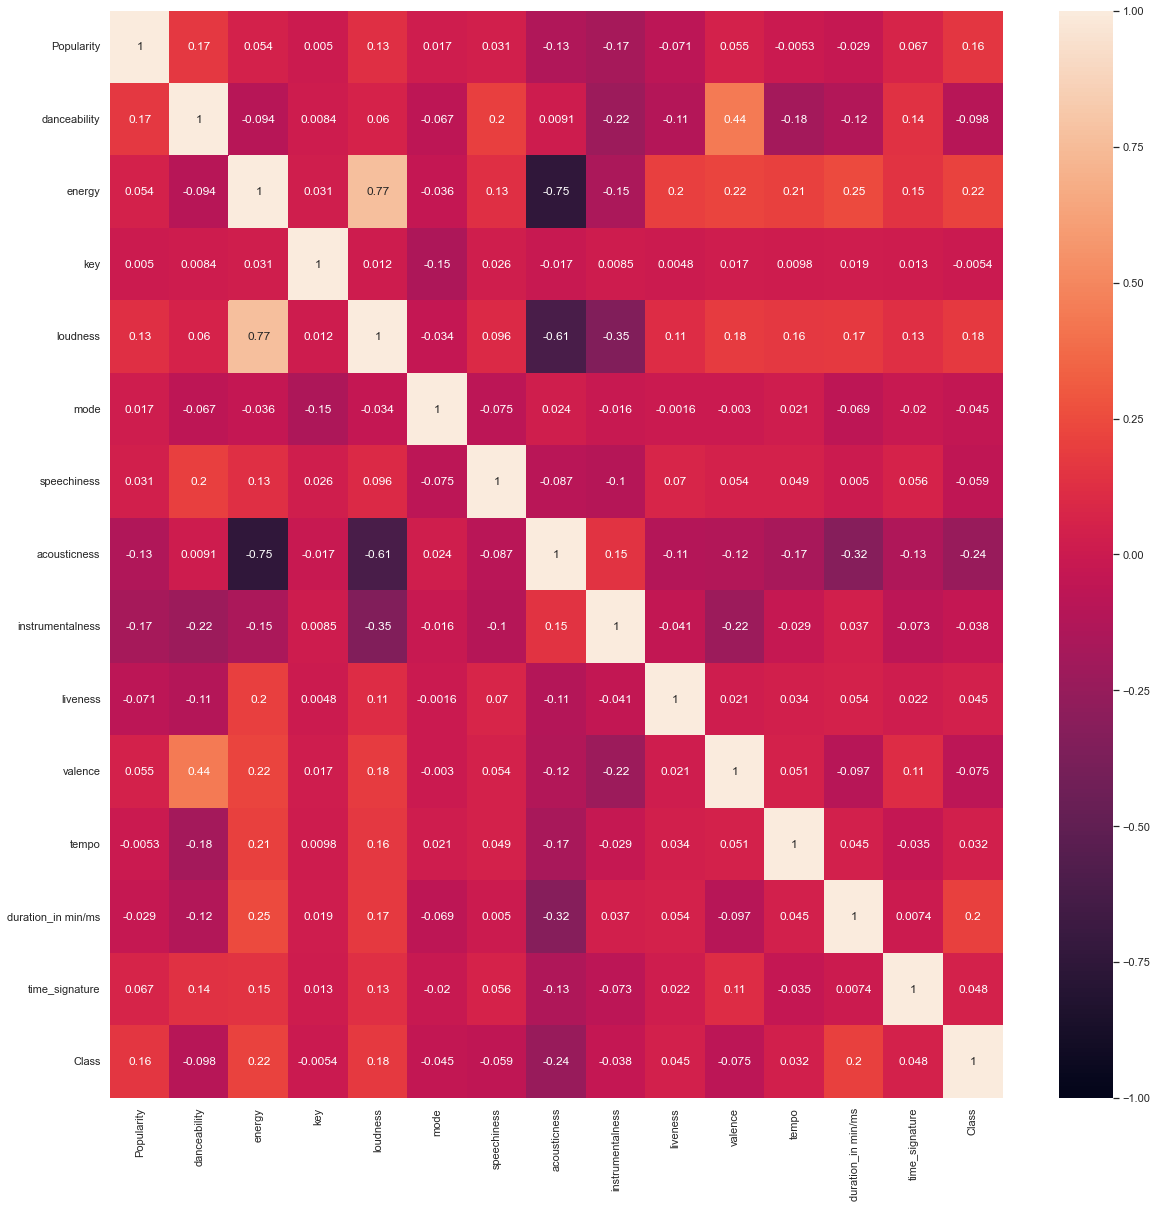

In [10]:
plt.figure(figsize=(20, 20))
sns.set_theme()
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True);

Hardly any correlations between variables except a negative one between **loudness** and **acousticness**, and a positive one between **loudness** and **energy**--both of which make intuitive sense. 

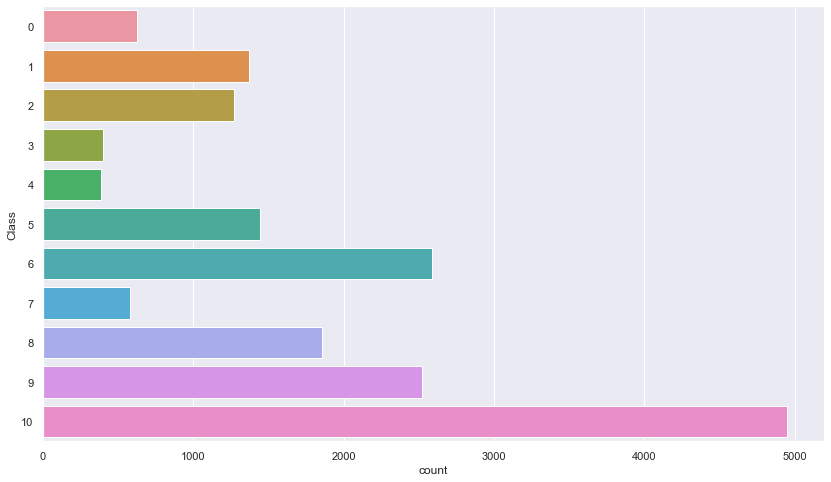

In [11]:
# Looking at distribution of classes 
plt.figure(figsize=(14, 8))
sns.countplot(y="Class", data=df)

Rock is heavily overrepresented here, while Bollywood, Country, Instrumental, and Acoustic / Folk are underrepresented. 

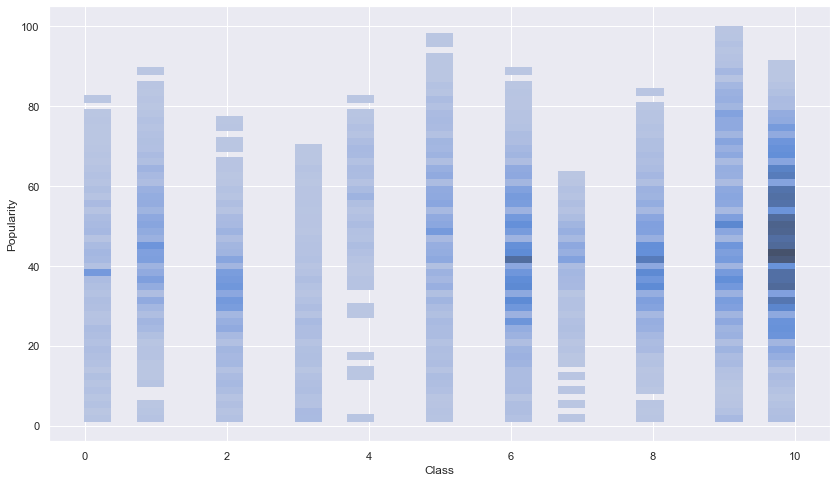

In [47]:
# Histogram of each genre's popularity
plt.figure(figsize=(14, 8))
sns.histplot(data=df, x="Class", y="Popularity")

Certain genres appear to miss the popularity peaks that others enjoy: Bollywood and Instrumental (3 and 7, respectively) do not seem to be nearly as popular as Hip Hop and Rock (5 and 10). Interestingly, Metal (9) has a very high peak, which is unexpected.

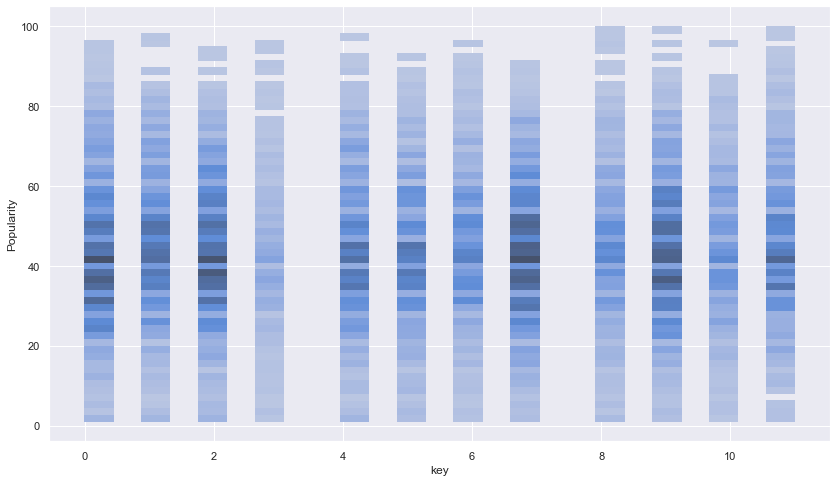

In [46]:
plt.figure(figsize=(14, 8))
sns.histplot(data=df, x="key", y="Popularity")

While some keys may be more commonly used than others, all appear to have relatively normal distributions of popularity.

In [13]:
# Separating out target variable
X = df.drop(['Class', 'Artist Name', 'Track Name'], axis=1)
y = df['Class']

# Splitting into stratified train and test sets, due to class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=df['Class'])

In [14]:
def modelPerformance(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    
    trn_preds = clf.predict(X_train)
    tst_preds = clf.predict(X_test)
    
    print(classification_report(y_train, trn_preds))
    print(classification_report(y_test, tst_preds))
    
    trn_cm = metrics.confusion_matrix(y_train, trn_preds)
    tst_cm = metrics.confusion_matrix(y_test, tst_preds)
    
    fig, axs = plt.subplots(2, 1, figsize=(12, 12))
    sns.heatmap(trn_cm, annot=True, ax=axs[0])
    sns.heatmap(tst_cm, annot=True, ax=axs[1])

### Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=21)

First, an initial test with no parameters.

In [16]:
modelPerformance(rf_clf, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       0.77      0.72      0.74      1098
           2       0.97      0.97      0.97      1018
           3       1.00      1.00      1.00       322
           4       1.00      1.00      1.00       310
           5       0.98      0.98      0.98      1157
           6       0.87      0.86      0.86      2069
           7       1.00      1.00      1.00       461
           8       0.96      0.95      0.95      1483
           9       0.96      0.95      0.95      2019
          10       0.91      0.93      0.92      3959

    accuracy                           0.92     14396
   macro avg       0.95      0.94      0.94     14396
weighted avg       0.92      0.92      0.92     14396

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       125
           1       0.04      0.02      0.03       275
           2       0.49 

Experiencing lots of overfitting, but it's not performing terribly. Next we'll tune.

In [17]:
from sklearn.model_selection import GridSearchCV

In [27]:
def modelTuning(params, clf, X_train, X_test, y_train, y_test):
    
    gs = GridSearchCV(estimator=clf, param_grid=params, scoring='accuracy', n_jobs=-1)
    gs.fit(X_train, y_train)
    
    gsBest = gs.best_estimator_
    print(gs.best_params_)
    
    modelPerformance(gsBest, X_train, X_test, y_train, y_test)
    
    return gs

In [20]:
params = {
    "min_samples_split" : [25, 50, 100, 250, 500], 
    "max_depth" : [1, 2, 3, 4, 5, None], 
    "n_estimators" : [50, 100, 250, 500, 750, 1000]
}

rf_tuned = modelTuning(params, rf_clf, X_train, X_test, y_train, y_test)

RandomForestClassifier(min_samples_split=25, n_estimators=250, random_state=21)
              precision    recall  f1-score   support

           0       0.84      0.94      0.88       500
           1       0.97      0.06      0.12      1098
           2       0.89      0.63      0.74      1018
           3       0.94      0.88      0.91       322
           4       0.89      0.81      0.85       310
           5       0.78      0.81      0.80      1157
           6       0.67      0.58      0.62      2069
           7       0.98      0.96      0.97       461
           8       0.84      0.69      0.76      1483
           9       0.75      0.74      0.74      2019
          10       0.62      0.91      0.74      3959

    accuracy                           0.72     14396
   macro avg       0.83      0.73      0.74     14396
weighted avg       0.76      0.72      0.70     14396

              precision    recall  f1-score   support

           0       0.68      0.82      0.74       12

Model accuracy has improved a little bit from 52% to 54%. More importantly, tuning for min_samples_split and n_estimators has significantly decreased overfitting from a 92% / 52% train to test differential to a 72% / 54% differential. We can continue tuning from here.

RandomForestClassifier(max_features=3, min_samples_leaf=3, min_samples_split=50,
                       n_estimators=750, random_state=21)
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       500
           1       1.00      0.01      0.01      1098
           2       0.82      0.48      0.60      1018
           3       0.89      0.79      0.84       322
           4       0.81      0.74      0.77       310
           5       0.74      0.76      0.75      1157
           6       0.57      0.46      0.51      2069
           7       0.96      0.94      0.95       461
           8       0.76      0.60      0.67      1483
           9       0.66      0.65      0.66      2019
          10       0.55      0.85      0.67      3959

    accuracy                           0.64     14396
   macro avg       0.77      0.65      0.66     14396
weighted avg       0.69      0.64      0.62     14396

              precision    recall  f1-score   su

C:\Users\kwndn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


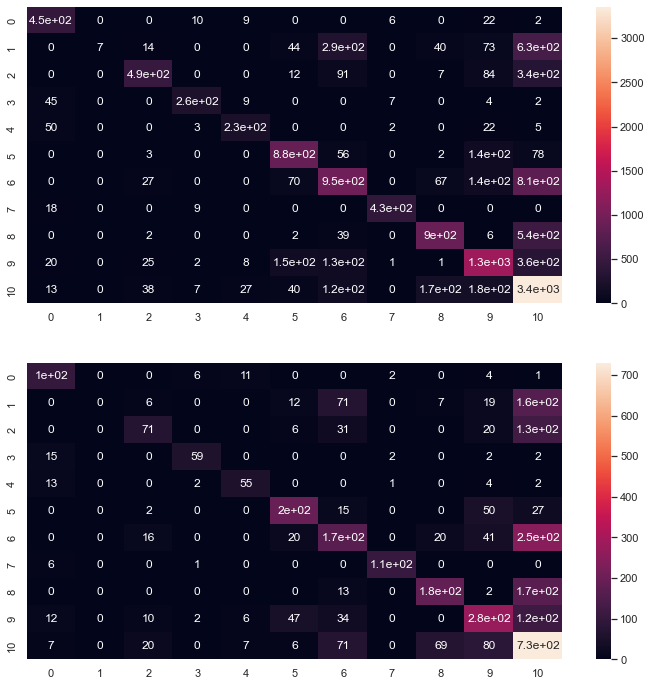

In [21]:
rf_clf = RandomForestClassifier(min_samples_split=50, n_estimators=750, random_state=21)

params = {
    "max_features" : [2, 3], 
    "min_samples_leaf" : [3, 4, 5]
}

rf_tuned_2 = modelTuning(params, rf_clf, X_train, X_test, y_train, y_test)

Again no accuracy gains, but overfitting continues to improve with just a 10% difference between training and testing.

### Gradient Boosting Classifier

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=21)

In [23]:
modelPerformance(gb_clf, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       500
           1       0.87      0.06      0.10      1098
           2       0.63      0.53      0.58      1018
           3       0.92      0.89      0.90       322
           4       0.82      0.86      0.84       310
           5       0.76      0.77      0.77      1157
           6       0.52      0.41      0.46      2069
           7       0.98      0.99      0.99       461
           8       0.70      0.63      0.66      1483
           9       0.61      0.64      0.62      2019
          10       0.53      0.74      0.62      3959

    accuracy                           0.62     14396
   macro avg       0.74      0.67      0.67     14396
weighted avg       0.65      0.62      0.60     14396

              precision    recall  f1-score   support

           0       0.68      0.81      0.74       125
           1       0.25      0.01      0.02       275
           2       0.47 

GradientBoostingClassifier(random_state=21)
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       500
           1       0.87      0.06      0.10      1098
           2       0.63      0.53      0.58      1018
           3       0.92      0.89      0.90       322
           4       0.82      0.86      0.84       310
           5       0.76      0.77      0.77      1157
           6       0.52      0.41      0.46      2069
           7       0.98      0.99      0.99       461
           8       0.70      0.63      0.66      1483
           9       0.61      0.64      0.62      2019
          10       0.53      0.74      0.62      3959

    accuracy                           0.62     14396
   macro avg       0.74      0.67      0.67     14396
weighted avg       0.65      0.62      0.60     14396

              precision    recall  f1-score   support

           0       0.68      0.81      0.74       125
           1       0.25      0.01 

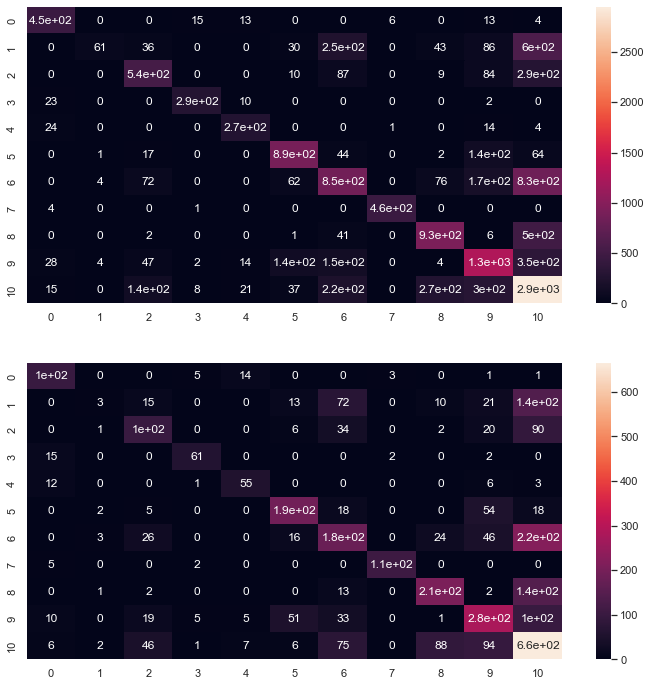

In [28]:
params = {
    "learning_rate" : [0.001, 0.01, 0.1, 0.5, 1], 
    "n_estimators" : [25, 50, 100, 250, 500]
}

gb_tuned = modelTuning(params, gb_clf, X_train, X_test, y_train, y_test)
gb_tuned.best_params_

GradientBoostingClassifier(min_samples_split=75)
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       500
           1       0.85      0.06      0.11      1098
           2       0.63      0.53      0.58      1018
           3       0.90      0.89      0.89       322
           4       0.82      0.86      0.84       310
           5       0.75      0.76      0.76      1157
           6       0.51      0.41      0.45      2069
           7       0.98      0.98      0.98       461
           8       0.69      0.61      0.65      1483
           9       0.61      0.63      0.62      2019
          10       0.53      0.74      0.62      3959

    accuracy                           0.62     14396
   macro avg       0.74      0.67      0.67     14396
weighted avg       0.64      0.62      0.60     14396

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       125
           1       0.21      

{'max_depth': 3, 'min_samples_split': 75}

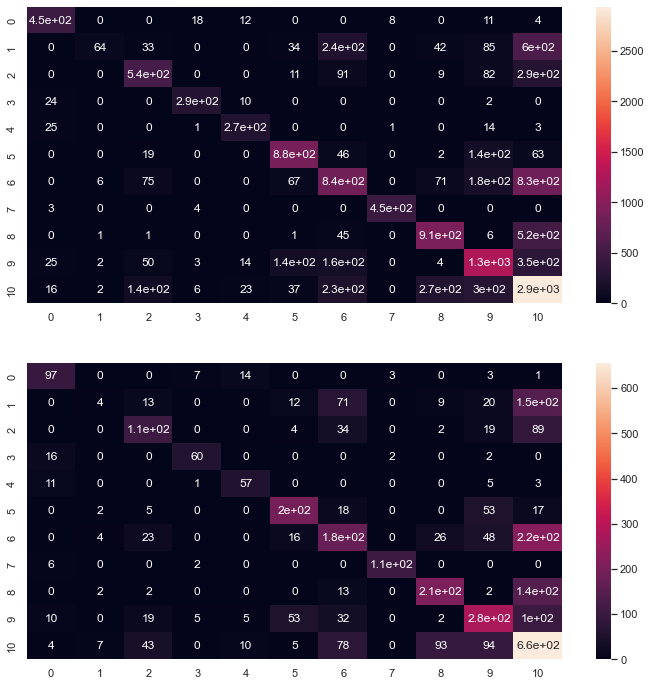

In [35]:
gb_clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100)

params = {
    "min_samples_split" : [5, 10, 25, 50, 75, 100], 
    "max_depth" : [2, 3, 5, 7, None]
}

gb_tuned_2 = modelTuning(params, gb_clf, X_train, X_test, y_train, y_test)
gb_tuned_2.best_params_

As suspected, there are no overall changes after continued tuning. However, the overall model performs slightly better than the tuned Random Forest--although, of course, it could be down to chance.

### Support Vector Classifier

In [36]:
from sklearn.svm import SVC
svc_clf = SVC(kernel='rbf')

C:\Users\kwndn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.24      1.00      0.39       500
           1       0.00      0.00      0.00      1098
           2       0.00      0.00      0.00      1018
           3       0.00      0.00      0.00       322
           4       0.00      0.00      0.00       310
           5       0.00      0.00      0.00      1157
           6       0.00      0.00      0.00      2069
           7       0.00      0.00      0.00       461
           8       0.00      0.00      0.00      1483
           9       0.00      0.00      0.00      2019
          10       0.31      0.96      0.47      3959

    accuracy                           0.30     14396
   macro avg       0.05      0.18      0.08     14396
weighted avg       0.09      0.30      0.14     14396

              precision    recall  f1-score   support

           0       0.24      1.00      0.39       125
           1       0.00      0.00      0.00       275
           2       0.00 

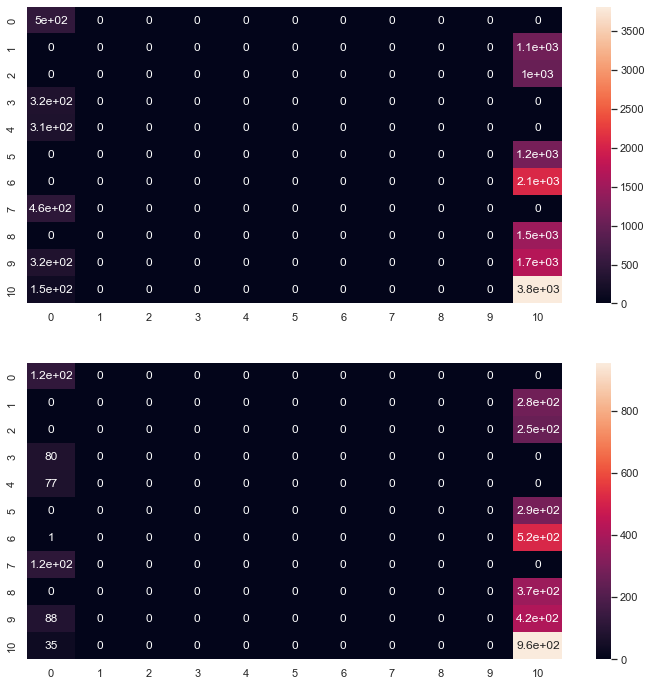

In [38]:
modelPerformance(svc_clf, X_train, X_test, y_train, y_test)

This first run performs quite poorly--it appears to only be making binary classifications as opposed to true multi-class predictions, even with the kernel. Perhaps tuning will help.

SVC(C=1, gamma=0.01)
              precision    recall  f1-score   support

           0       0.59      0.69      0.64       500
           1       0.99      0.51      0.67      1098
           2       1.00      0.93      0.97      1018
           3       0.69      0.63      0.66       322
           4       0.58      0.65      0.61       310
           5       1.00      0.96      0.98      1157
           6       0.84      0.89      0.87      2069
           7       0.86      0.86      0.86       461
           8       1.00      0.90      0.94      1483
           9       0.92      0.88      0.90      2019
          10       0.83      0.97      0.90      3959

    accuracy                           0.87     14396
   macro avg       0.85      0.81      0.82     14396
weighted avg       0.88      0.87      0.87     14396

              precision    recall  f1-score   support

           0       0.47      0.57      0.51       125
           1       0.00      0.00      0.00       275
   

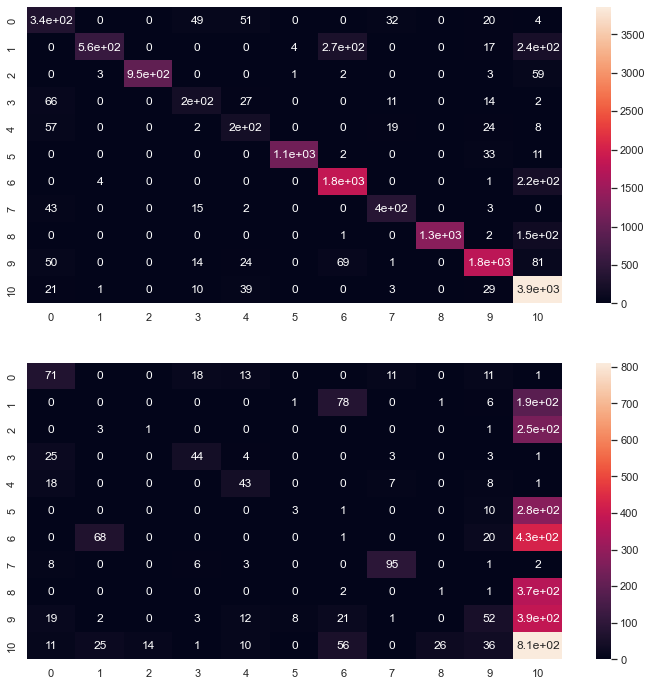

In [40]:
params = {
    'C': [1, 10, 100, 1000], 
    'gamma': [0.001, 0.01, 0.1, 1]
}

svc_tuned = modelTuning(params, svc_clf, X_train, X_test, y_train, y_test)

In [42]:
svc_tuned.best_params_

{'C': 1, 'gamma': 0.01}

The model at least appears to be making regular predictions now. However, the accuracy has barely improved, while overfitting has increased immensely. This appears to be enough evidence to indicate a support vector machine is not the best approach for this data. Since Random Forest seemed to have actual improvements during tuning, we'll return to that model.

### Random Forest: Additional Tuning

We'll try some class weights and warm starts to see if that improves the model.

In [55]:
rf_clf = RandomForestClassifier(
    max_features=3, 
    min_samples_leaf=3, 
    min_samples_split=50, 
    n_estimators=750, 
    random_state=21, 
    class_weight='balanced',
)

modelPerformance(rf_clf, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.72      0.89      0.80       500
           1       0.53      0.59      0.56      1098
           2       0.47      0.85      0.61      1018
           3       0.76      0.89      0.82       322
           4       0.50      0.89      0.64       310
           5       0.67      0.86      0.75      1157
           6       0.59      0.47      0.52      2069
           7       0.97      0.94      0.96       461
           8       0.56      0.86      0.68      1483
           9       0.62      0.56      0.59      2019
          10       0.75      0.40      0.52      3959

    accuracy                           0.62     14396
   macro avg       0.65      0.75      0.68     14396
weighted avg       0.65      0.62      0.61     14396

              precision    recall  f1-score   support

           0       0.62      0.77      0.69       125
           1       0.13      0.10      0.11       275
           2       0.33 

Interesting that weighting classes has a small but significant negative impact on test performance.

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       500
           1       1.00      0.01      0.01      1098
           2       0.82      0.48      0.60      1018
           3       0.89      0.79      0.84       322
           4       0.81      0.74      0.77       310
           5       0.74      0.76      0.75      1157
           6       0.57      0.46      0.51      2069
           7       0.96      0.94      0.95       461
           8       0.76      0.60      0.67      1483
           9       0.66      0.65      0.66      2019
          10       0.55      0.85      0.67      3959

    accuracy                           0.64     14396
   macro avg       0.77      0.65      0.66     14396
weighted avg       0.69      0.64      0.62     14396

              precision    recall  f1-score   support

           0       0.66      0.81      0.72       125
           1       0.00      0.00      0.00       275
           2       0.57 

C:\Users\kwndn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


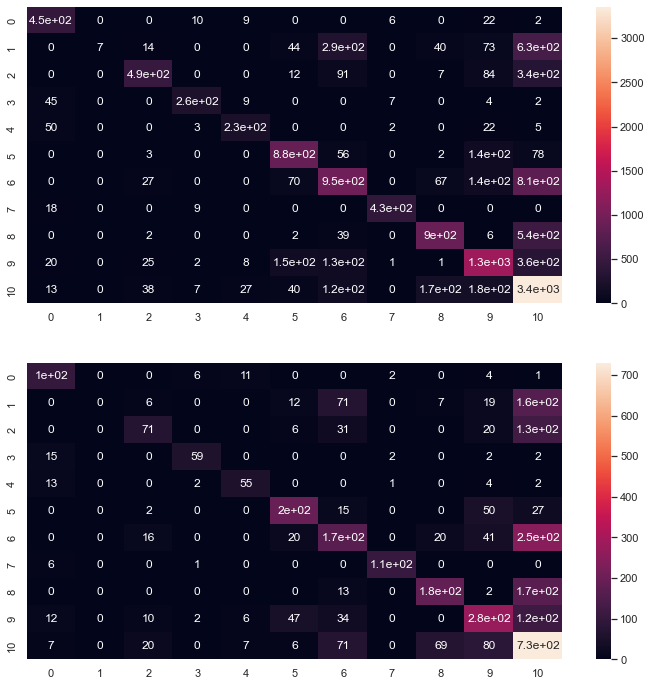

In [56]:
rf_clf = RandomForestClassifier(
    max_features=3, 
    min_samples_leaf=3, 
    min_samples_split=50, 
    n_estimators=750, 
    random_state=21, 
    warm_start=True,
)

modelPerformance(rf_clf, X_train, X_test, y_train, y_test)

Without balanced classes we're back to the best performance we achieved from before. No real improvements, however.

## Conclusions

Random Forest improved the most with tuning, but Gradient Boosting had slightly better overall model performance. In the end, neither classifier proved particularly powerful at predicting music genre given Spotify's track data. In the future, it might be interesting to see how Spotify's data affects the popularity of a song instead, using regression instead of classification.